In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data = pd.read_csv('IRIS.csv')

<IPython.core.display.Javascript object>

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.isna().value_counts()

sepal_length  sepal_width  petal_length  petal_width  species
False         False        False         False        False      150
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

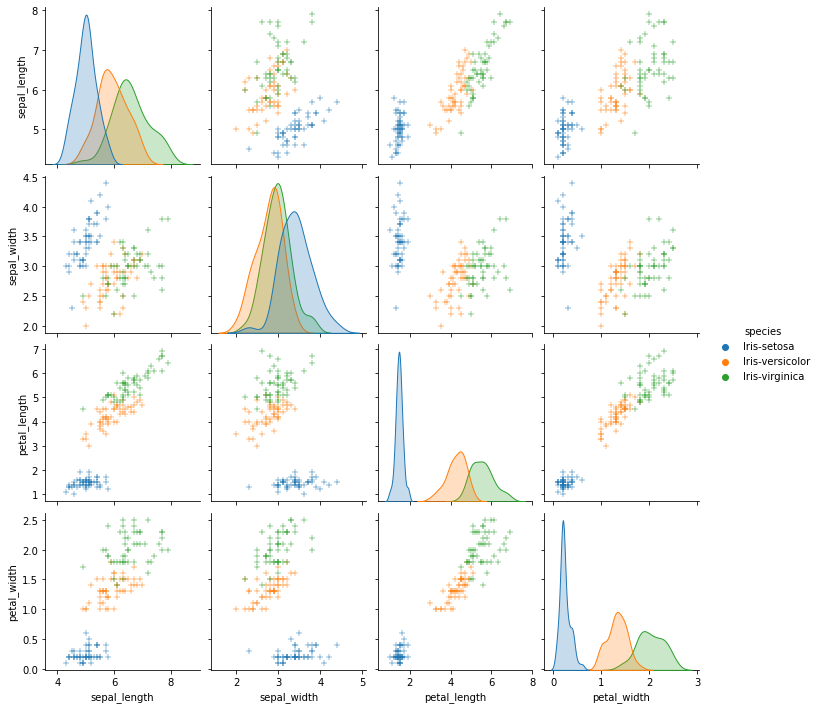

In [7]:
grph = sns.pairplot(data, hue='species', markers='+')
plt.show()

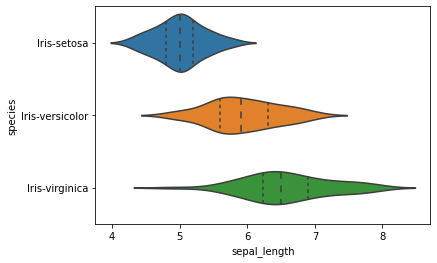

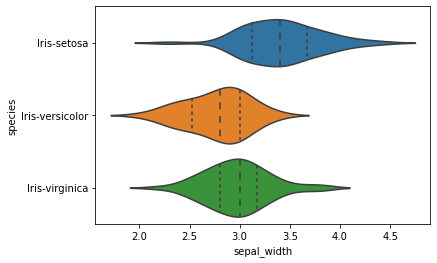

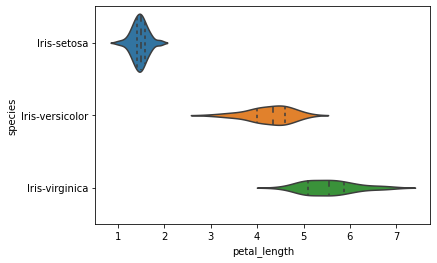

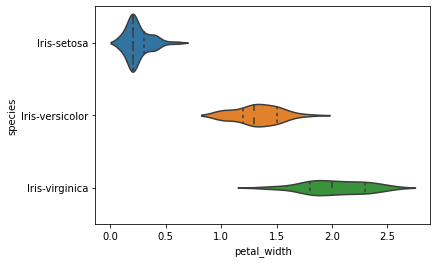

In [8]:
grph = sns.violinplot(y='species', x='sepal_length', data=data, inner='quartile')
plt.show()
grph = sns.violinplot(y='species', x='sepal_width', data=data, inner='quartile')
plt.show()
grph = sns.violinplot(y='species', x='petal_length', data=data, inner='quartile')
plt.show()
grph = sns.violinplot(y='species', x='petal_width', data=data, inner='quartile')
plt.show()

In [9]:
data['species']=LabelEncoder().fit_transform(data['species'])

In [10]:
X = data.drop(['species'],axis=1)
Y=data['species']

In [11]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [13]:
Y.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=5)

In [15]:
k_ngb=list(range(1,12))
accu=[]
for i in k_ngb :
    knn = KNeighborsClassifier( n_neighbors=i).fit(x_train,y_train)
    Y_pred = knn.predict(x_test)
    accu.append(metrics.accuracy_score(y_test,Y_pred))

In [16]:
accu

[0.9666666666666667,
 0.9166666666666666,
 0.9833333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9833333333333333,
 0.9833333333333333,
 1.0,
 0.9833333333333333,
 1.0]

In [17]:
knn = KNeighborsClassifier( n_neighbors=9).fit(x_train,y_train)
Y_pred = knn.predict(x_test)


In [18]:
metrics.accuracy_score(y_test,Y_pred)

1.0

In [19]:
temp=knn.predict([[6.7,3.0,5.2,2.3]])

In [20]:
temp

array([2])